## 导入包和数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as systime
import datetime as dt
import string
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
print('train.info')
train.info()

train.info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [3]:
print('train.shape:')
train.shape

train.shape:


(878049, 9)

In [5]:
train.head(3)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414


In [6]:
print('test.info')
test.info()

test.info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
Id            884262 non-null int64
Dates         884262 non-null object
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [7]:
print('test.shape:')
test.shape

test.shape:


(884262, 7)

In [8]:
test.head(3)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212


## 数据分析

In [10]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

### Category

In [11]:
#可以通过groupby().size()方法返回分组后的统计结果
cate_group = train.groupby(by='Category').size()
cate_group

Category
ARSON                            1513
ASSAULT                         76876
BAD CHECKS                        406
BRIBERY                           289
BURGLARY                        36755
DISORDERLY CONDUCT               4320
DRIVING UNDER THE INFLUENCE      2268
DRUG/NARCOTIC                   53971
DRUNKENNESS                      4280
EMBEZZLEMENT                     1166
EXTORTION                         256
FAMILY OFFENSES                   491
FORGERY/COUNTERFEITING          10609
FRAUD                           16679
GAMBLING                          146
KIDNAPPING                       2341
LARCENY/THEFT                  174900
LIQUOR LAWS                      1903
LOITERING                        1225
MISSING PERSON                  25989
NON-CRIMINAL                    92304
OTHER OFFENSES                 126182
PORNOGRAPHY/OBSCENE MAT            22
PROSTITUTION                     7484
RECOVERED VEHICLE                3138
ROBBERY                         23000
RUN

#### 类别数量

In [12]:
#目标分类共有多少种类型
cat_num = len(cate_group.index)
cat_num

39

#### 类别排序

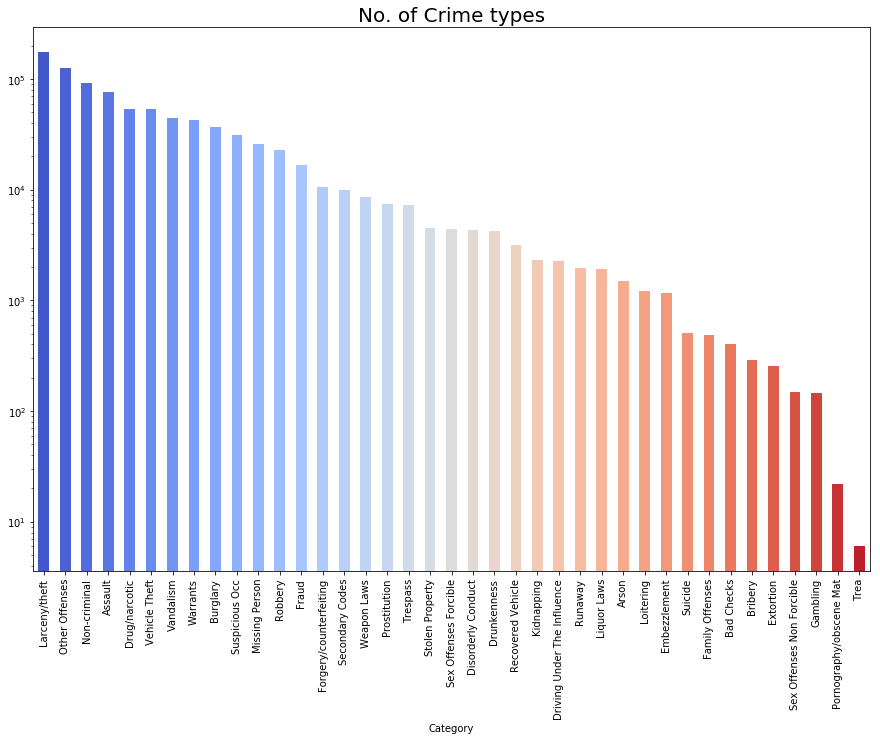

In [13]:
cate_group.index = cate_group.index.map(string.capwords)
cate_group.sort_values(ascending=False,inplace=True)
cate_group.plot(kind='bar',logy=True,figsize=(15,10),color=sns.color_palette('coolwarm',cat_num))
plt.title('No. of Crime types',fontsize=20)
plt.show()

#### 总犯罪数量

In [14]:
sum(cate_group)#总共犯罪案件数量

878049

#### 犯罪集中程度

In [15]:
top6 = list(cate_group.index[:6])
top15 = list(cate_group.index[:15])
total = sum(cate_group)

topsum = 0
for i in top6:
    topsum = cate_group[i]+topsum
print('Top6 crimes about:'+str(100*topsum/total)+'%'+' in total')

topsum=0
for i in top15:
    topsum+=cate_group[i]
print('Top15 crimes about:'+str(100*topsum/total)+'%'+' in total')

Top6 crimes about:65.82935576488327% in total
Top15 crimes about:93.31871000365584% in total


### PdDistrict

In [16]:
dis_group = train.groupby(by='PdDistrict').size()
print(len(dis_group))
dis_group

10


PdDistrict
BAYVIEW        89431
CENTRAL        85460
INGLESIDE      78845
MISSION       119908
NORTHERN      105296
PARK           49313
RICHMOND       45209
SOUTHERN      157182
TARAVAL        65596
TENDERLOIN     81809
dtype: int64

#### 地区排行

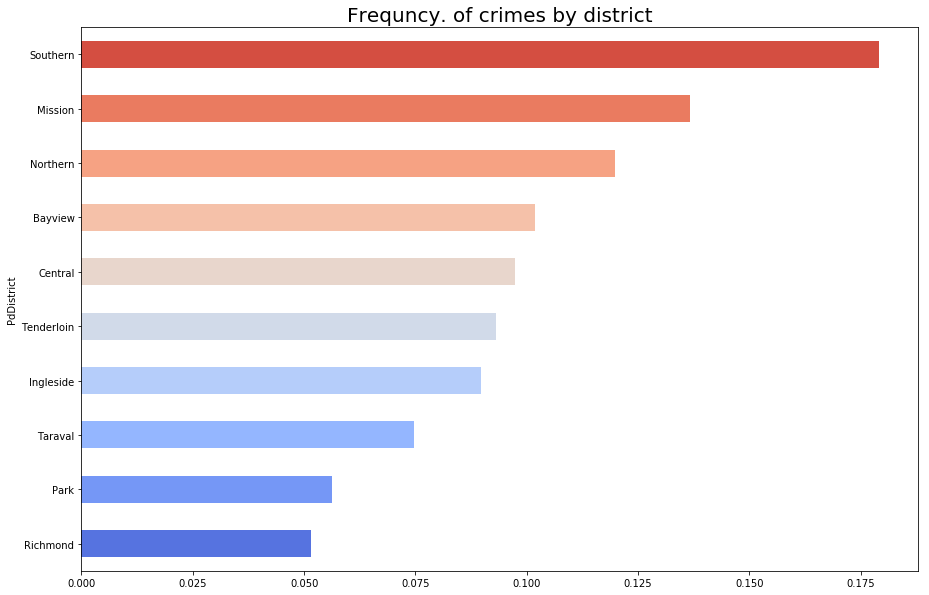

In [17]:
dis_group = dis_group/sum(dis_group)
dis_group.index = dis_group.index.map(string.capwords)
dis_group.sort_values(ascending=True,inplace=True)
dis_group.plot(kind='barh',figsize=(15,10),fontsize=10,color=sns.color_palette('coolwarm',10))
plt.title('Frequncy. of crimes by district',fontsize=20)
plt.show()

#### year/month/day

In [18]:
#将object类型转为datetime类型
train['date'] = pd.to_datetime(train['Dates'])
train.head(1)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,date
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00


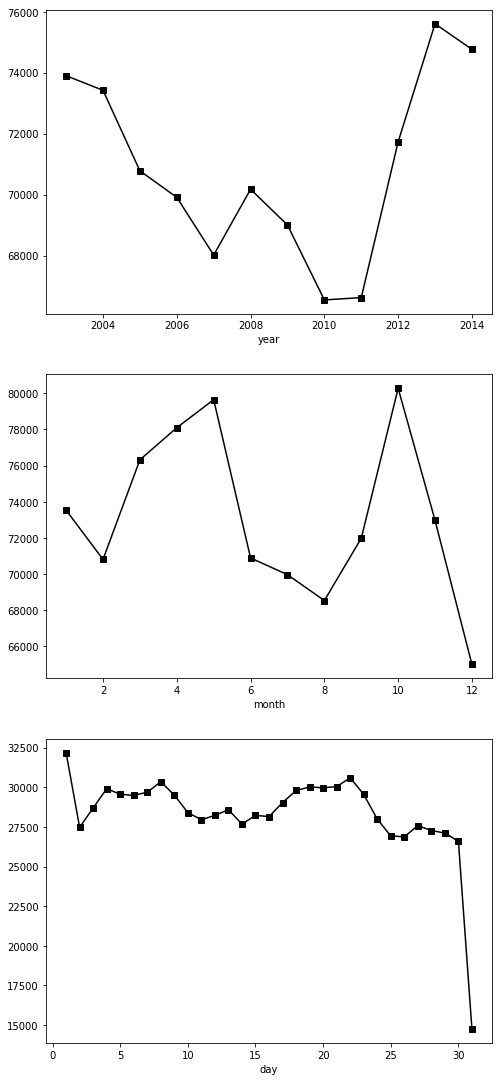

In [19]:
train['year'] = train.date.dt.year
train['month'] = train.date.dt.month
train['day'] = train.date.dt.day
train['hour'] = train.date.dt.hour
plt.figure(figsize=(8,19))

year_group = train.groupby('year').size()
plt.subplot(311)
plt.plot(year_group.index[:-1],year_group[:-1],'ks-')
plt.xlabel('year')

month_group = train.groupby('month').size()
plt.subplot(312)
plt.plot(month_group,'ks-')
plt.xlabel('month')

day_group = train.groupby('day').size()
plt.subplot(313)
plt.plot(day_group,'ks-')
plt.xlabel('day')

plt.show()

#### Day of week

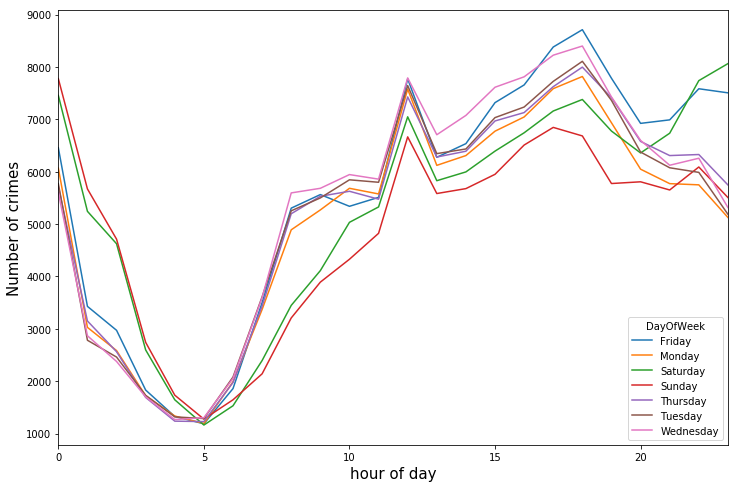

In [20]:
week_group = train.groupby(['DayOfWeek','hour']).size()#多重分组
week_group = week_group.unstack()#对分组后的多重索引转为xy索引

week_group.T.plot(figsize=(12,8))#行列互换后画图
plt.xlabel('hour of day',size=15)
plt.ylabel('Number of crimes',size=15)
plt.show()

### 高发案件的时间和地点

#### hour

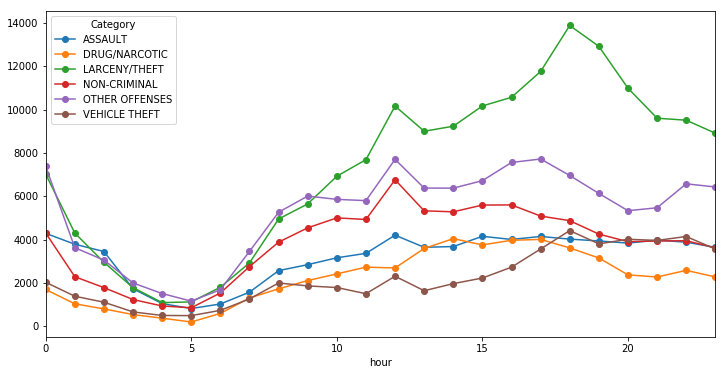

In [21]:
tmp = train[train['Category'].map(string.capwords).isin(top6)]
tmp_group = tmp.groupby(['Category','hour']).size()
tmp_group = tmp_group.unstack()
tmp_group.T.plot(figsize=(12,6),style='o-')
plt.show()

#### PdDistrict

In [22]:
tmp2 = tmp.groupby(['Category','PdDistrict']).size()
tmp2.unstack()

PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ASSAULT,9857,6977,8533,11149,8318,3515,3202,12183,5463,7679
DRUG/NARCOTIC,4498,1805,2373,8757,4511,2573,999,9228,1531,17696
LARCENY/THEFT,10119,25060,10236,18223,28630,9146,9893,41845,11845,9903
NON-CRIMINAL,6099,10940,6853,12372,10240,5925,5744,19745,6919,7467
OTHER OFFENSES,17053,8901,13203,19330,12233,6184,5632,21308,8614,13724
VEHICLE THEFT,7219,4210,8960,7148,6291,3963,4117,4725,6142,1006


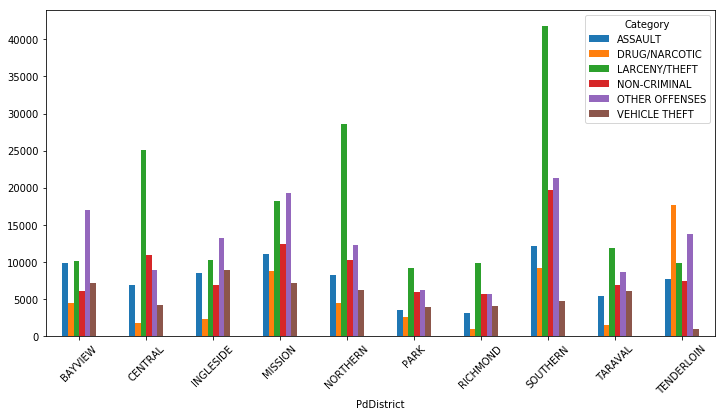

In [23]:
tmp2.unstack().T.plot(kind='bar',figsize=(12,6),rot=45)
plt.show()

#### DayOfWeek

In [24]:
tmp3 = tmp.groupby(['Category','DayOfWeek']).size()
tmp3 = tmp3.unstack()
tmp3.sum(axis=1)[0]

76876

In [25]:
tmp3.iloc[0]

DayOfWeek
Friday       11160
Monday       10560
Saturday     11995
Sunday       12082
Thursday     10246
Tuesday      10280
Wednesday    10553
Name: ASSAULT, dtype: int64

In [26]:
for i in range(6):
    tmp3.iloc[i] = tmp3.iloc[i]/tmp3.sum(axis=1)[i]
tmp3

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Category,,,,,,,
ASSAULT,0.145169,0.137364,0.156030,0.157162,0.133280,0.133722,0.137273
DRUG/NARCOTIC,0.137481,0.144948,0.118397,0.113820,0.156640,0.157010,0.171703
LARCENY/THEFT,0.154969,0.134763,0.155615,0.138079,0.139594,0.136975,0.140006
NON-CRIMINAL,0.151499,0.139268,0.151749,0.140546,0.138878,0.138001,0.140059
OTHER OFFENSES,0.147311,0.140963,0.135748,0.122498,0.146312,0.149062,0.158105
VEHICLE THEFT,0.160149,0.137818,0.150964,0.139529,0.138636,0.135048,0.137855


In [27]:
wkm = {
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6
}
tmp3.columns = tmp3.columns.map(wkm)
tmp3 = tmp3.ix[:,range(7)]
tmp3

/home/fangjie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


DayOfWeek,0,1,2,3,4,5,6
Category,,,,,,,
ASSAULT,0.137364,0.133722,0.137273,0.133280,0.145169,0.156030,0.157162
DRUG/NARCOTIC,0.144948,0.157010,0.171703,0.156640,0.137481,0.118397,0.113820
LARCENY/THEFT,0.134763,0.136975,0.140006,0.139594,0.154969,0.155615,0.138079
NON-CRIMINAL,0.139268,0.138001,0.140059,0.138878,0.151499,0.151749,0.140546
OTHER OFFENSES,0.140963,0.149062,0.158105,0.146312,0.147311,0.135748,0.122498
VEHICLE THEFT,0.137818,0.135048,0.137855,0.138636,0.160149,0.150964,0.139529


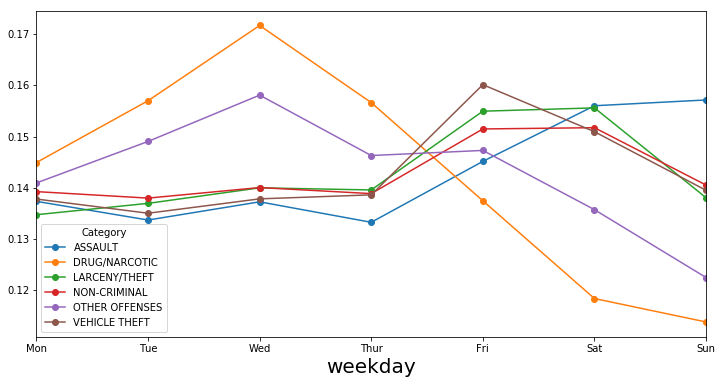

In [28]:
tmp3.T.plot(figsize=(12,6),style='o-')
plt.xlabel("weekday",size=20)
#plt.axes.set_xticks([])
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.show()

#### month

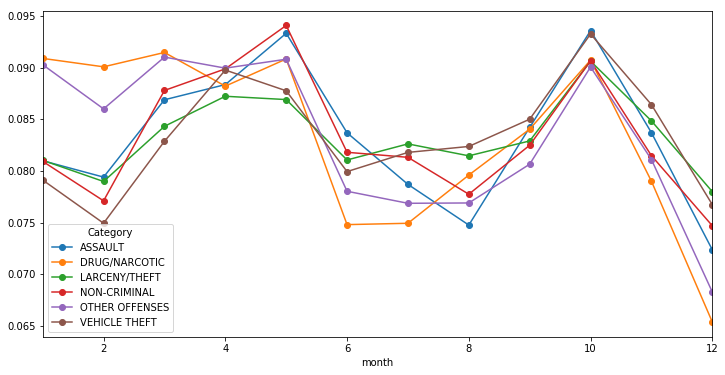

In [29]:
mon_g = tmp.groupby(['Category','month']).size()
mon_g = mon_g.unstack()
for i in range(6):
    mon_g.iloc[i] = mon_g.iloc[i]/mon_g.sum(axis=1)[i]
mon_g.T.plot(figsize=(12,6),style='o-')
plt.show()

### 高发案件的时间趋势

In [30]:
ddf = tmp.groupby(['Category',pd.Grouper('date')]).size()
ddf = ddf.unstack().fillna(0)
ddf = ddf.T#将时间序列设为index方便后续使用resample进行统计
ddf.index

DatetimeIndex(['2015-05-13 23:53:00', '2015-05-13 23:33:00',
               '2015-05-13 23:30:00', '2015-05-13 23:00:00',
               '2015-05-13 22:58:00', '2015-05-13 22:30:00',
               '2015-05-13 22:06:00', '2015-05-13 22:00:00',
               '2015-05-13 21:55:00', '2015-05-13 21:40:00',
               ...
               '2003-01-06 02:00:00', '2003-01-06 01:54:00',
               '2003-01-06 01:50:00', '2003-01-06 01:36:00',
               '2003-01-06 00:55:00', '2003-01-06 00:40:00',
               '2003-01-06 00:33:00', '2003-01-06 00:31:00',
               '2003-01-06 00:20:00', '2003-01-06 00:01:00'],
              dtype='datetime64[ns]', name='date', length=306742, freq=None)

/home/fangjie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


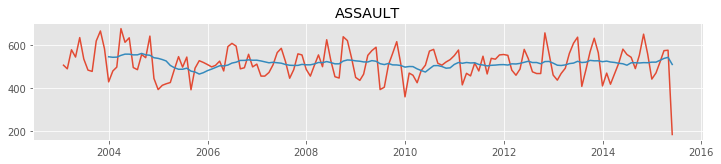

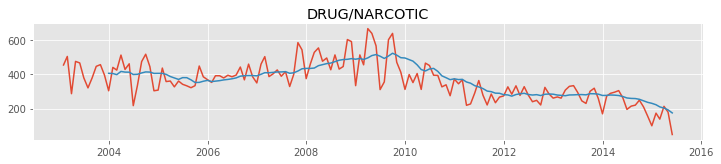

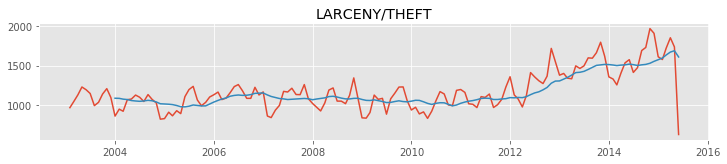

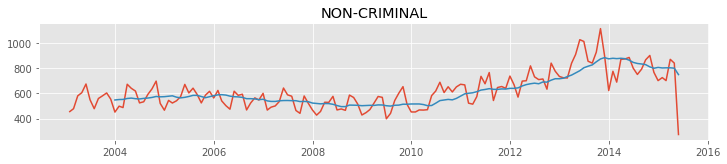

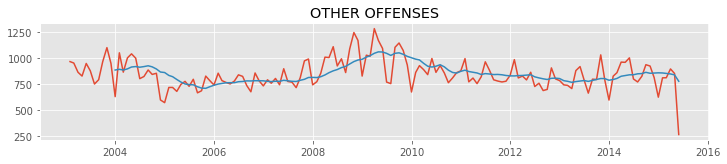

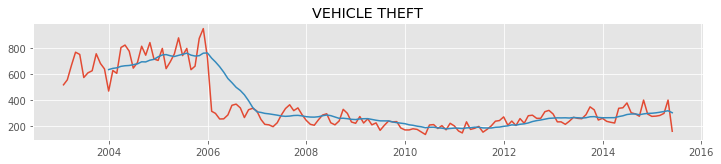

In [31]:
df2 = ddf.resample('m',how='sum')#按月求和
plt.style.use('ggplot')
moav = df2.rolling(12).mean()#每12个月统计平均，相当于加了个窗
i = 1
for cat in df2.columns:
    plt.figure(figsize=(12,15))
    ax = plt.subplot(6,1,i)
    plt.plot(df2.index,df2[cat])
    plt.plot(df2.index,moav[cat])
    plt.title(cat)
    i+=1

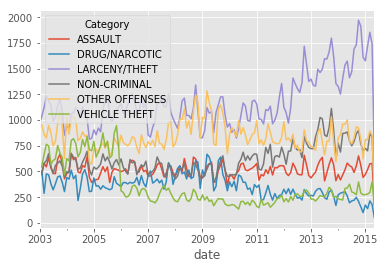

In [32]:
df2.plot()

#### 地图坐标展示

In [33]:
train[['X','Y']].describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [34]:
#show SF map
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
plt.figure(figsize=(8,8))
plt.imshow(mapdata,cmap=plt.get_cmap('gray'))
plt.show()

OSError: sf_map_copyright_openstreetmap_contributors.txt not found.

In [35]:
im = plt.imread('SanFranMap.png')
plt.figure(figsize=(8,8))
ax = sns.kdeplot(theft.X,theft.Y,clip=clipsize,aspect=1/asp)
#ax = sns.regplot('X', 'Y', data=theft, fit_reg=False)
ax.imshow(im,cmap=plt.get_cmap('gray'),extent=lon_lat_box,aspect=asp)

FileNotFoundError: [Errno 2] No such file or directory: 'SanFranMap.png'

## 数据处理

In [36]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#对测试集的Dates做同样的处理
test['date'] = pd.to_datetime(test['Dates'])
test['year'] = test.date.dt.year
test['month'] = test.date.dt.month
test['day'] = test.date.dt.day
test['hour'] = test.date.dt.hour
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 12 columns):
Id            884262 non-null int64
Dates         884262 non-null object
DayOfWeek     884262 non-null object
PdDistrict    884262 non-null object
Address       884262 non-null object
X             884262 non-null float64
Y             884262 non-null float64
date          884262 non-null datetime64[ns]
year          884262 non-null int64
month         884262 non-null int64
day           884262 non-null int64
hour          884262 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 81.0+ MB


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 14 columns):
Dates         878049 non-null object
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
date          878049 non-null datetime64[ns]
year          878049 non-null int64
month         878049 non-null int64
day           878049 non-null int64
hour          878049 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 93.8+ MB


### 预测类别标签

In [38]:
#对分类目标做标签化处理
label = preprocessing.LabelEncoder()
target = label.fit_transform(train.Category)
target

array([37, 21, 21, ..., 16, 35, 12])

In [39]:
#处理不统一的特征
Id = test['Id']
des = train['Descript']
res = train['Resolution']
train.drop(['Category','Descript','Resolution'],axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)
#合并数据方便处理
full = pd.concat([train,test],keys=['train','test'])
full.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1762311 entries, (train, 0) to (test, 884261)
Data columns (total 11 columns):
Dates         object
DayOfWeek     object
PdDistrict    object
Address       object
X             float64
Y             float64
date          datetime64[ns]
year          int64
month         int64
day           int64
hour          int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 163.0+ MB


### 选取特征

In [40]:
#对DayOfWeek做one-hot编码转为数值型
week = pd.get_dummies(full.DayOfWeek)
#PdDistrict和Address重复
#选择PdDistrict并做处理
full.drop('Address',axis=1,inplace=True)
dist = pd.get_dummies(full.PdDistrict)
#时间特征
#删除重复的Dates,date
full.drop(['Dates','date'],axis=1,inplace=True)
full['newy'] = full['month'].apply(lambda x:1 if x==1 or x==2 else 0)
full['dark'] = full['hour'].apply(lambda x:1 if x>=18 and x<=24 else 0)
hour_dum = pd.get_dummies(full.hour)
year_dum = pd.get_dummies(full.year)
month_dum = pd.get_dummies(full.month)
#删除、合并特征
full.drop(['month','hour','day','year','DayOfWeek','PdDistrict'],axis=1,inplace=True)

full = pd.concat([full,week,dist,year_dum,month_dum,hour_dum,],axis=1)
full.isnull().sum()

X             0
Y             0
newy          0
dark          0
Friday        0
Monday        0
Saturday      0
Sunday        0
Thursday      0
Tuesday       0
Wednesday     0
BAYVIEW       0
CENTRAL       0
INGLESIDE     0
MISSION       0
NORTHERN      0
PARK          0
RICHMOND      0
SOUTHERN      0
TARAVAL       0
TENDERLOIN    0
2003          0
2004          0
2005          0
2006          0
2007          0
2008          0
2009          0
2010          0
2011          0
             ..
7             0
8             0
9             0
10            0
11            0
12            0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
Length: 70, dtype: int64

#### 生成验证集、测试集

In [41]:
#加入所有特征
training,valid,y_train,y_valid = train_test_split(full[:train.shape[0]],target,train_size=0.7,random_state=0)
training.shape

/home/fangjie/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(614634, 70)

#### model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
import time
training.shape

(614634, 70)

#### 逻辑回归

In [43]:
LR = LogisticRegression(C=0.1)
lrstart = time.time()
LR.fit(training, y_train)
lrcost_time = time.time()-lrstart
predicted = np.array(LR.predict_proba(valid))
print("逻辑回归log损失为 %f" %(log_loss(y_valid, predicted)))
print('逻辑回归建模耗时 %f 秒' %(lrcost_time))

/home/fangjie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fangjie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


逻辑回归log损失为 2.560718
逻辑回归建模耗时 182.353171 秒


#### 朴素贝叶斯

In [44]:
NB = BernoulliNB()
nbstart = time.time()
NB.fit(training,y_train)
nbcost_time = time.time()-nbstart
predicted = np.array(NB.predict_proba(valid))
print("贝叶斯log损失为 %f" %(log_loss(y_valid, predicted)))
print( "朴素贝叶斯建模耗时 %f 秒" %(nbcost_time))

贝叶斯log损失为 2.573997
朴素贝叶斯建模耗时 0.918329 秒


In [45]:
train_all = np.c_[training,y_train]
train_all.shape

(614634, 71)

In [46]:
np.savetxt('forBP_train.csv',train_all,fmt='%d',delimiter=',')

#### 随机森林

In [47]:
from sklearn.ensemble import RandomForestClassifier

params = [12,13,14,15,16]
for par in params:
    clf = RandomForestClassifier(n_estimators=30, max_depth=par)
    clf.fit(training,y_train)
    predicted = np.array(clf.predict_proba(valid))
    print("随机森林log损失为 %f" %(log_loss(y_valid, predicted)))

随机森林log损失为 2.520659
随机森林log损失为 2.506776
随机森林log损失为 2.490849
随机森林log损失为 2.485368
随机森林log损失为 2.475053


In [48]:
#write the result
result = NB.predict_proba(full[train.shape[0]:])
submission = pd.DataFrame(result,columns=label.classes_)
submission.to_csv('SFresult_v1.csv',index = False, index_label='Id' )
submission.shape

(884262, 39)